<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [165]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [166]:
import warnings
warnings.simplefilter("ignore", category=Warning)

#### Read the dataset in the csv file from the URL


In [167]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [168]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# 1. Deskriptive Statistics / Data visualizations

a) For the "Median value of owner-occupied homes" provide a boxplot  
b) Provide a  bar plot for the Charles river variable  
c) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)  
d) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?  
e) Create a histogram for the pupil to teacher ratio variable  





**1a)** For the "Median value of owner-occupied homes" provide a boxplot  

*MEDV:* Median value of owner-occupied homes in $1000's

[Text(0.5, 0, "MEDV: Median value of owner-occupied homes in $1000's")]

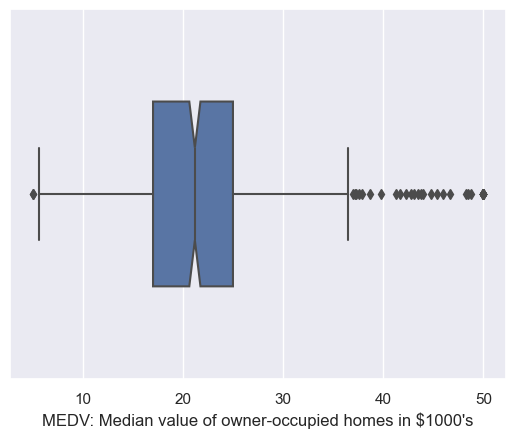

In [169]:
#Boxplot
sns.set_theme()
ax = sns.boxplot(x="MEDV", data=boston_df, width=.5,notch=True)
# add label to the axis and label to the plot
ax.set(xlabel ="MEDV: Median value of owner-occupied homes in $1000's")

**1b)** Provide a  bar plot for the Charles river variable  

*Variable CHAS:* Charles River dummy variable (1 if tract bounds river; 0 otherwise)

In [170]:
# Not necessary step: Transformation of the CHAS variable to yes/no 
boston_df["CHAS"].replace({0: "no", 1: "yes"}, inplace=True)

[Text(0.5, 0, 'CHAS: Carles river')]

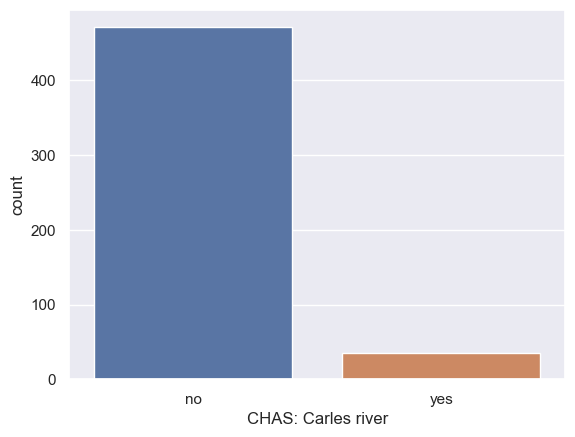

In [171]:
#barplot
sns.set_theme()
ax = sns.countplot(x="CHAS", data=boston_df)
ax.set(xlabel = "CHAS: Carles river")

**1c)** Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older) 

In [172]:
# some descriptive statistics
age = boston_df.describe()[['AGE']]
age

,AGE
count,506.000000
mean,68.574901
std,28.148861
min,2.900000
25%,45.025000
50%,77.500000
75%,94.075000
max,100.000000


In [173]:
## categoric variable: ageGroup
bins= [0,35,70,110]
labels = ['35 years and younger','35 and 70 years','70 years and older']
boston_df['AgeGroup'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AgeGroup
0,0,0.00632,18.0,2.31,no,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35 and 70 years
1,1,0.02731,0.0,7.07,no,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,no,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35 and 70 years
3,3,0.03237,0.0,2.18,no,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35 and 70 years
4,4,0.06905,0.0,2.18,no,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35 and 70 years


In [174]:
# overview AgeGroup
counts = boston_df['AgeGroup'].value_counts()
print(counts)

AgeGroup
70 years and older      287
35 and 70 years         128
35 years and younger     91
Name: count, dtype: int64


[Text(0, 0.5, 'MEDV: median values of house'),
 Text(0.5, 0, 'AGE group: proportion of owner-occupied units built prior to 1940')]

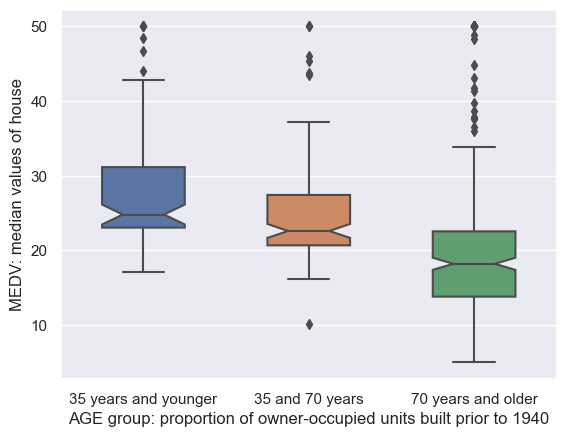

In [175]:
#Boxplot
ax = sns.boxplot(y="MEDV", x="AgeGroup", data=boston_df, width=.5,notch=True)
# add label to the axis and label to the plot
ax.set(ylabel ="MEDV: median values of house", xlabel = "AGE group: proportion of owner-occupied units built prior to 1940")

**1d)** Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?  
*NOX:* nitric oxides concentration (parts per 10 million)  
*INDUS:* proportion of non-retail business acres per town.

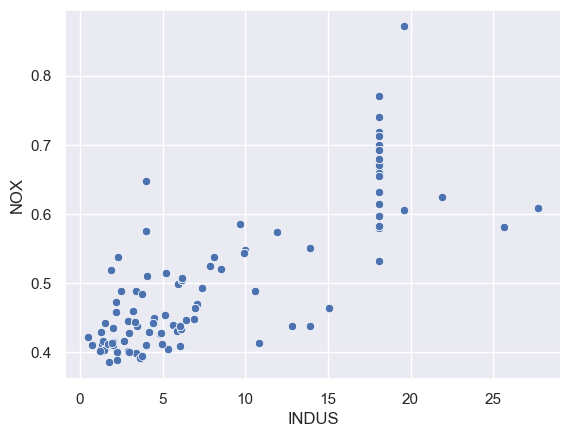

In [176]:
# Scatterplot
ax = sns.scatterplot(y='NOX', x='INDUS', data=boston_df)

**Conclusion:** There  exists a (positive) relationship between  NOX (nitric oxides concentration) and INDUS (proportion of non-retail business acres per town).

**1e)** Create a histogram for the pupil to teacher ratio variable   
*PTRATIO:* pupil-teacher ratio by town

In [177]:
# Overview PTRATIO
ptratio = boston_df.describe()[['PTRATIO']]
ptratio

,PTRATIO
count,506.000000
mean,18.455534
std,2.164946
min,12.600000
25%,17.400000
50%,19.050000
75%,20.200000
max,22.000000


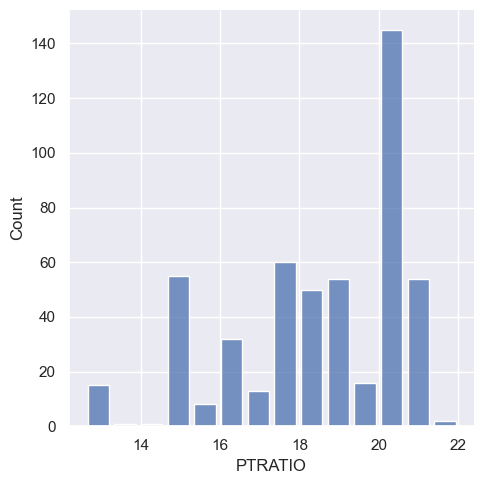

In [178]:
# Histogram
sns.displot(boston_df, x="PTRATIO", shrink=.8)

# 2. Hypothesis / Testing / Regression

a) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)  
b) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)  
c) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)  
d) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)  


Be sure to:

State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.


**2a)**  Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in median values of houses bounded by the Charles river or not")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in median values of houses bounded by the Charles river or not")

α = 0.05


In [179]:
#step 1: descriptive statistics Boxplot MEDV and CHAS
chas_med = boston_df.groupby('CHAS')[['MEDV']].describe()
chas_med

MEDV                                                     
      count       mean        std   min   25%   50%    75%   max
CHAS                                                            
no    471.0  22.093843   8.831362   5.0  16.6  20.9  24.80  50.0
yes    35.0  28.440000  11.816643  13.4  21.1  23.3  33.15  50.0

In [180]:
**Conclusion:** The median values for houses bordering the river are higher (mean: 28.4, median: 23.3) than for houses not bordering the river (mean: 22.1, median: 20.9).  

SyntaxError: invalid syntax (3934696705.py, line 1)

[Text(0, 0.5, 'MEDV: median values of house'),
 Text(0.5, 0, 'CHAS: Carles river')]

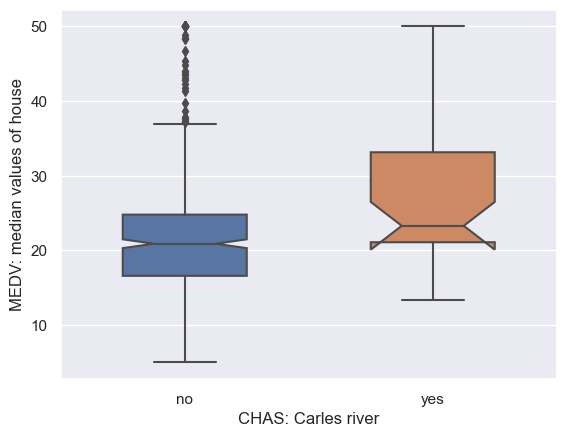

In [ ]:
#step 1: Boxplot MEDV and CHAS
ax = sns.boxplot(y="MEDV", x="CHAS", data=boston_df, width=.5,notch=True)
# add label to the axis and label to the plot
ax.set(ylabel ="MEDV: median values of house", xlabel = "CHAS: Carles river")

[Text(0.5, 0, 'MEDV: Median Value of Owner-Occupied Homes (in $1000)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Median Value of Owner-Occupied Home')]

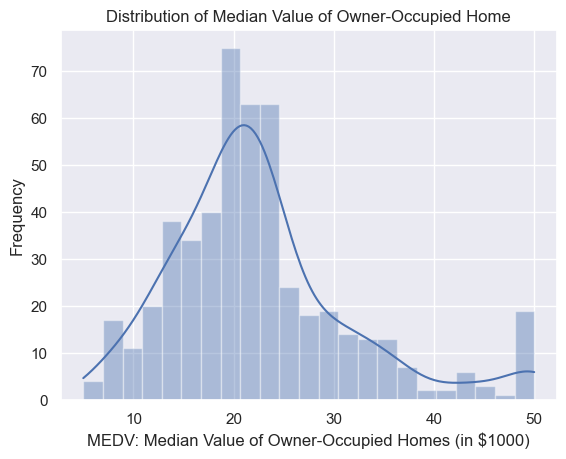

In [ ]:
#step 3: normality test / normality plot
ax=sns.histplot(
   boston_df['MEDV'], kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
ax.set(xlabel ="MEDV: Median Value of Owner-Occupied Homes (in $1000)", ylabel = "Frequency", title='Distribution of Median Value of Owner-Occupied Home')

In [ ]:
## step 4: levene test
scipy.stats.levene(boston_df[boston_df['CHAS'] == 'yes']['MEDV'],
                   boston_df[boston_df['CHAS'] == 'no']['MEDV'], center='mean')

# since the p-value is smaller than 0.05 we can not NOT assume equality of variance


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [ ]:
# step 5: T test with equal_var=F
t_statistic, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 'yes']['MEDV'],
                   boston_df[boston_df['CHAS'] == 'no']['MEDV'], equal_var = False)
print("T_Statistic: {0}, P-Value: {1}".format(t_statistic,p_value))

T_Statistic: 3.113291312794837, P-Value: 0.003567170098137517


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median values of houses bounded by the Charles river 

**2b)**  Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)  
* $H_0: µ_1 = µ_2$ ("there is no difference in median values for each proportion of owner occupied units built prior to 1940")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in median values for each proportion of owner occupied units built prior to 1940")

α = 0.05

In [ ]:
## AGE GROUP
f_statistic, p_value = scipy.stats.f_oneway(boston_df['MEDV'][boston_df['AgeGroup'] == '35 years and younger'],
               boston_df['MEDV'][boston_df['AgeGroup'] == '35 and 70 years'],
               boston_df['MEDV'][boston_df['AgeGroup'] == '70 years and older'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis. The difference in the variable MEDV according to AGE group is statistically significant.

**2c)**  Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)  
* $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town  
α = 0.05

In [ ]:

pearson, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("r_pearson: {0}, P-Value: {1}".format(pearson,p_value))

r_pearson: 0.7636514469209152, P-Value: 7.913361061239527e-98


**Conclusion:** Since the p-value  < 0.05, we reject the Null hypothesis and conclude that there  exists a (positive) relationship between  NOX and INDUS. The correlation coefficient (r) is 0.76, which is rather high.


**2d)**  What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)  

*DIS:* weighted distances to five Boston employment centres

* $H_0: β1$ = 0 (Variable weighted distances has no effect on the median value of owner occupied homes)
* $H_1: β1$ is not equal to 0 (Variable weighted distances  has an effect on the median value of owner occupied homes)  
α = 0.05

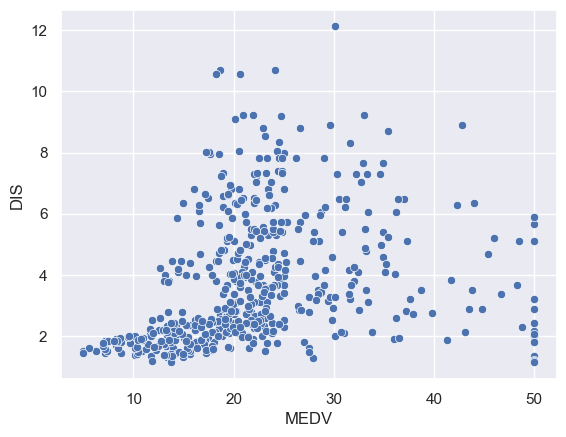

In [ ]:
ax = sns.scatterplot(y='DIS', x='MEDV', data=boston_df)

In [ ]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.21e-08
Time:                        20:07:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion:** The p-value is less than the alpha (α) level = 0.05. We reject the null hypothesis as there is evidence that there is a changes in DIS affect MEDV. On average, each additional unit of weighted distance to the five Boston employment centres (DIS) is associated with an increase of 1.1 units in the median home value, and this effect is statistically significant at the 0.05 level.  